This notebook shows a single time step for a succesful nudging simulation. The simulation uses a neural network (`models/268/5.pkl`) as well as a nudging term of the form
$$
\frac{\partial \tilde{x}}{\partial t}_{nudge} = \frac{1}{\tau}\left(x(t) - \tilde{x}\right).
$$
Nudging is used for humidity, the horizontal velocities, and SLI with a time-scale of $\tau=0.5$ day.

In [1]:
import glob
paths = glob.glob('../data/runs/model268-epoch5.nudge/OUT_3D/*.pt')
state = torch.load(paths[-1])
# state = torch.load('test/OUT_3D/CASE_control_0000000080.pt')

print(f"Day = {state['day']}")

Day = 115.5


# Winds

In [2]:
u = state['x_wind']
fu_n = state['tendency_of_x_wind_due_to_nudging']
fu_d = state['tendency_of_x_wind_due_to_dynamics']

## Nudging Tendency

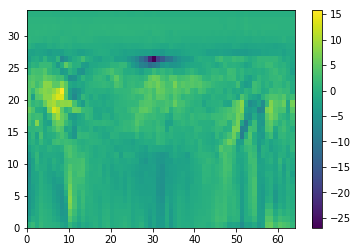

In [3]:
plt.pcolormesh(fu_n[:, :,1])
plt.colorbar()

## Dynamics tendency

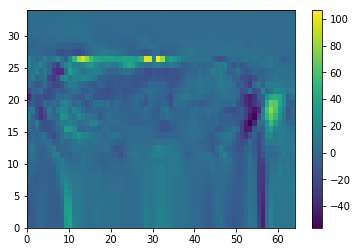

In [4]:
plt.pcolormesh(fu_d[:, :,0])
plt.colorbar()

The dynamics tendency is about 8 times larger than the nudging tendency, which is good.

# Humidity

In [5]:
field = 'total_water_mixing_ratio'

u = state[field]
n = state[f'tendency_of_{field}_due_to_nudging']
d = state[f'tendency_of_{field}_due_to_neural_network']

Here is QT for the 10th model level for the nudged simulation:

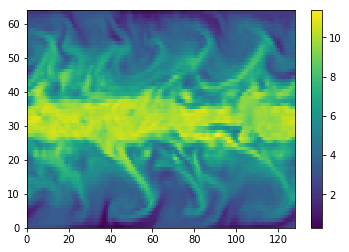

In [6]:
plt.pcolormesh(u[10])
plt.colorbar()

And for the training data

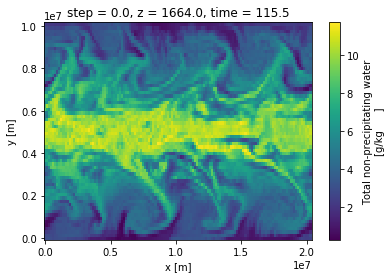

In [7]:
ds = xr.open_dataset("../data/processed/training.nc")

qt = ds.QT[:,0].interp(time=state['day']).isel(z=10)
qt.plot()

The nudged simulation succesfully tracks the ng-aqua!

Here is the nudging tendency:

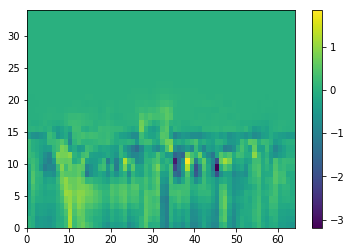

In [8]:
plt.pcolormesh(n[:,:,0])
plt.colorbar()

And the neural networks tendency:

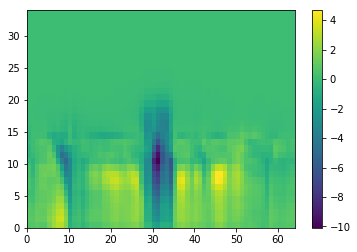

In [9]:
plt.pcolormesh(d[:,:,0])
plt.colorbar()

The nudging tendency is about 1/4 that of the NN, which is what we want!